In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10) # (w, h)



## Kmeans

In [88]:
# Initialization functions

def plusplus(X, k):
    """
    Kmeans ++ Initialization
    """

    for t in range(k):
        if(t == 0):
            # First centroid is random sample
            j = np.random.randint(np.shape(X)[0],size = 1)
            C = X[j]
            centroids = C
            
        else:
            # For each point , compute the distance to the closest center already selected
            Xr = np.stack([X for i in range(k)], axis = -1)
            distances = np.sum(np.square(Xr - centroids.T), axis = 1)
            d = np.min(distances, axis = -1)

            # Minimum distances to probability distribution
            d = np.array(d / np.sum(d))

            # Selects new centroid at random based on the distribution
            new_i = np.random.choice(np.shape(X)[0] , p = d)
            C = np.vstack((C, X[new_i]))

    return C

def random_select(X, k):
    """
    Selects k random points among the observations
    """
    idx = np.random.randint(np.shape(X)[0], size = k)
    return X[idx]


def random_uniform(X, k):
    """ 
    Returns k points picked uniformly at random on the smallest rectangle containing all the observations
    """
    x0 = np.random.uniform(np.amin(X[:,0]),np.amax(X[:,0]) , k)
    y0 = np.random.uniform(np.amin(X[:,1]),np.amax(X[:,1]) , k)
    C0 = np.c_[x0, y0]
    return C0


In [89]:
class KMeans(object):
    """
    Class for Kmeans clustering
    """
    def __init__(self):
        self.centroids = None
        self.labels = None
        self.train_errors = None
   
    def fit(self, X, k = 5, initialize_f=plusplus, C0=None, Niter=100):
        """ 
        Labels the input distribution into classes using the K-means algorithm

        Parameters
        ----------
            X : Array containing datapoints
            k : Number of clusters  
            initialize_func : initialization function. Must take as input an observation matrix X and and integer k 
                    and return a list of k centroids having the dimensions of the observations.
            C0 : optional, initial centroids
            Niter : Number of iterations
            
        Returns
        -------
            labels: label[i] is the label of the i-th observation X[i]
            centroids: final centroids
            errors: inertia at each iteration
        """
        if C0 is None:
            C0 = initialize_f(X, k)
        
        centroids = C0 # Centroids
        errors = np.zeros(Niter + 1) # Mean quadratic errors

        ## Compute initial labels

        labels, error = self.assign_labels(X, centroids, k)
        errors[0] = error

        ## Iterate
        for t in range(Niter):
            # Update centroids
            centroids = self.update_centroids(X, labels, k)

            # Assign labels using the new centroids, store the mean quadratic error
            labels, error = self.assign_labels(X, centroids, k)

            errors[t + 1] = error

        self.centroids = centroids
        self.labels = labels
        self.training_errors = errors
        
        return labels, centroids, errors

    
    def assign_labels(self, X, centroids, k):
        """
        Assigns the closest centroid to each data point
        """
        Xr = np.stack([X for i in range(k)], axis = -1) # Xr has dimension (nRows(X), nCols(X), k)

        distances = np.sum(np.square(Xr - centroids.T), axis = 1) 
        
        closest_centroids = np.argmin(distances, axis = -1)

        loss_value = np.sum(np.min(distances, axis = -1))

        return(closest_centroids, loss_value)

    def update_centroids(self, X, labels, k):
        """
        Updates the centroids given the label assignation computer before
        """
        
        return(np.array([np.mean(X[labels == c], axis = 0) for c in range(k)]))
    

    

<Figure size 2160x720 with 0 Axes>

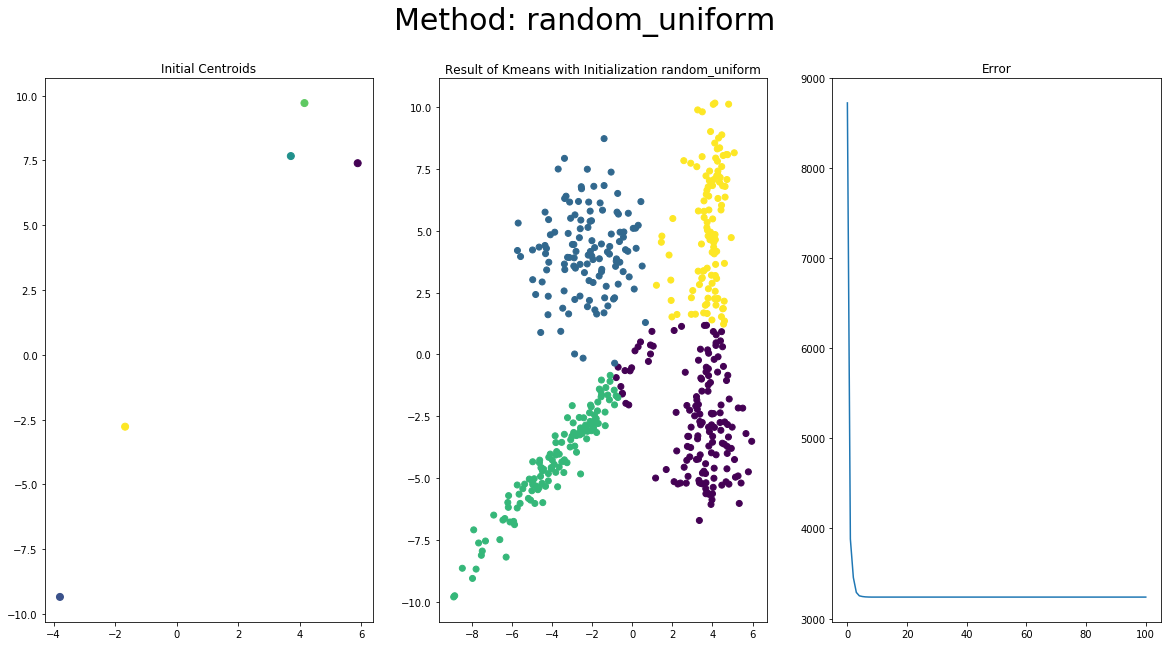

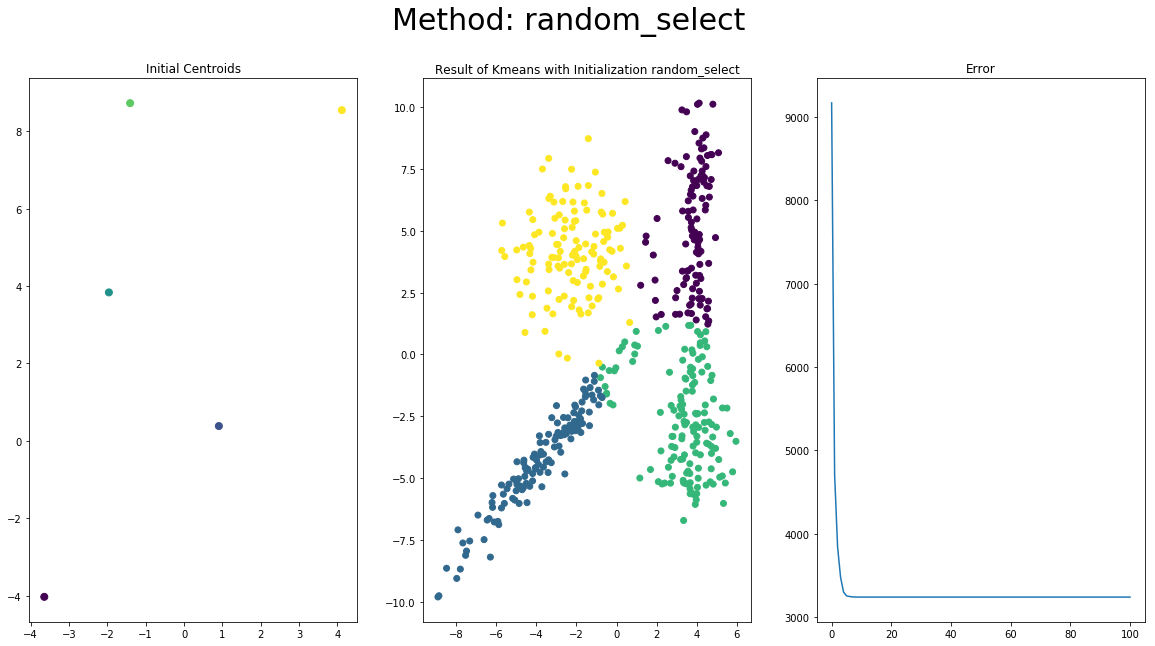

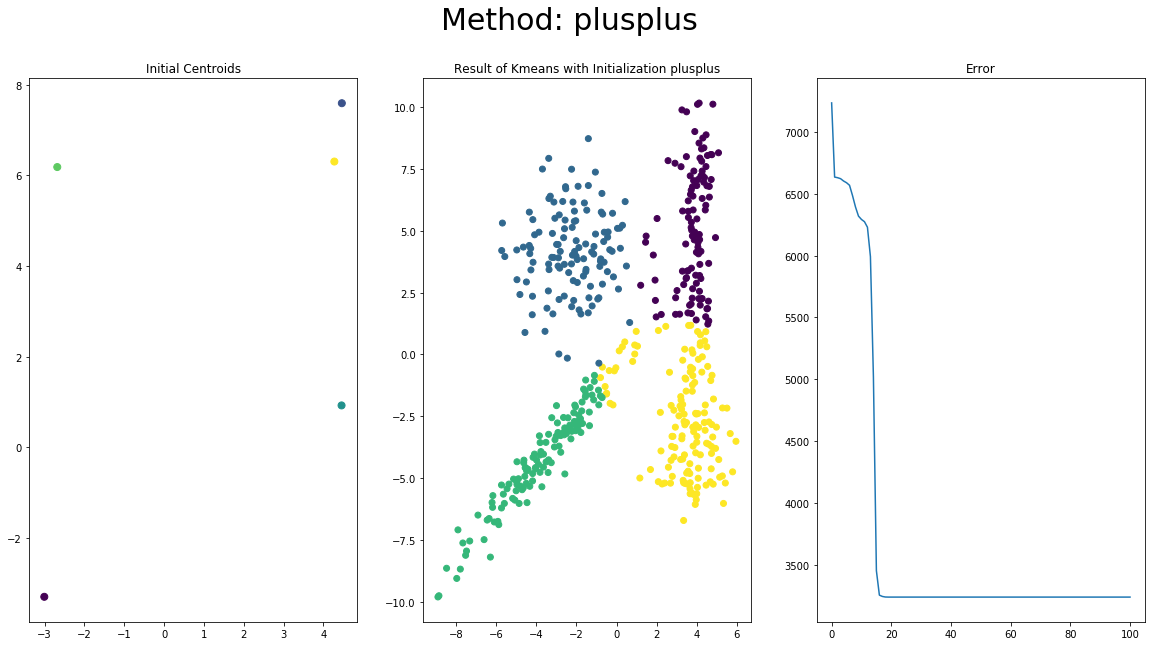

In [91]:
n_classes = 5
f = plt.figure(figsize = (30,10))
for i, initialize_method in enumerate([random_uniform, random_select, plusplus]):
    C0 = initialize_method(X, n_classes)
    
    colors = np.array(range(n_classes))
    

    f,(ax1,ax2, ax3) = plt.subplots(1, 3)
    
    f.suptitle("Method: " + initialize_method.__name__, size = 30)
    ax1.scatter(C0[:,0], C0[:,1], c=colors, s=49)
    ax1.set_title('Initial Centroids')
    kmeans = KMeans()
    
    labels, centroids, errors = kmeans.fit(X, k, initialize_method)
    function_name = initialize_method.__name__
    ax2.scatter(X[:,0], X[:,1], c=labels)
    ax2.set_title('Result of Kmeans with Initialization ' + function_name)

    ax3.plot(errors)
    ax3.set_title("Error")
